In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import imp
_, pathgrbz, _ = imp.find_module("pyGRBz")
path = os.getcwd()

/tmp/ipykernel_1062445/2432108722.py:7: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


# Fit only one Light Curve

In [3]:
from pyGRBz.pyGRBz import GRB_photoZ

In [13]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/Tuto/LC/')

In [14]:
# Load the same GRB but with its light curve stored in data/lc/
photoz.load_data(data_dir='/data/lc/',data_name=['GRB_22'])


Observations:
  Name  time_since_burst band   flux  flux_err Texp  zp flux_unit detection telescope
------ ---------------- ---- ------- -------- ---- --- --------- --------- ---------
GRB_22             60.0  gri  18.723   0.0448 30.0   -        AB         1   colibri
GRB_22             60.0   zy 17.6187   0.0498 30.0   -        AB         1   colibri
GRB_22             95.0    r 19.4355    0.067 30.0   -        AB         1   colibri
GRB_22             95.0    y 18.1537   0.1091 30.0   -        AB         1   colibri
GRB_22            130.0    i 18.8971   0.0671 30.0   -        AB         1   colibri
GRB_22            130.0    z 18.7193   0.0862 30.0   -        AB         1   colibri
GRB_22            165.0    g 21.7265   0.3149 30.0   -        AB         0   colibri
GRB_22            165.0    y  18.943   0.1964 30.0   -        AB         1   colibri
GRB_22            200.0    r  20.508    0.131 30.0   -        AB         1   colibri
GRB_22            200.0    z  19.348   0.1333 30.

In [15]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
  Name  time_since_burst band   flux  flux_err Texp ... zeropoint         sys_response        ext_mag     flux_corr        flux_corr_err   
                                                   ...                                                    microJy            microJy      
------ ---------------- ---- ------- -------- ---- ... --------- --------------------------- ------- ------------------ ------------------
GRB_22            270.0    g 21.7265   0.3149 30.0 ...       0.0 0.008212068850472548 .. 0.0     0.0 7.4028679049192725 1.4652919723935014
GRB_22            165.0    g 21.7265   0.3149 30.0 ...       0.0 0.008212068850472548 .. 0.0     0.0 7.4028679049192725 1.4652919723935014
GRB_22             60.0  gri  18.723   0.0448 30.0 ...       0.0 0.008212068850472548 .. 0.0     0.0 117.70637907805646  2.354127581561129
GRB_22            305.0    r 21.1404   0.2114 30.0 ...       0.0                  0.0 .. 0.0     0.0 12.701060946255039  1.572571249775574
GRB_22   

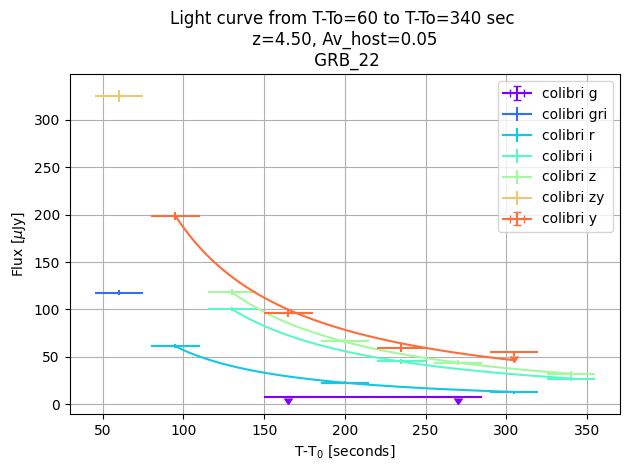

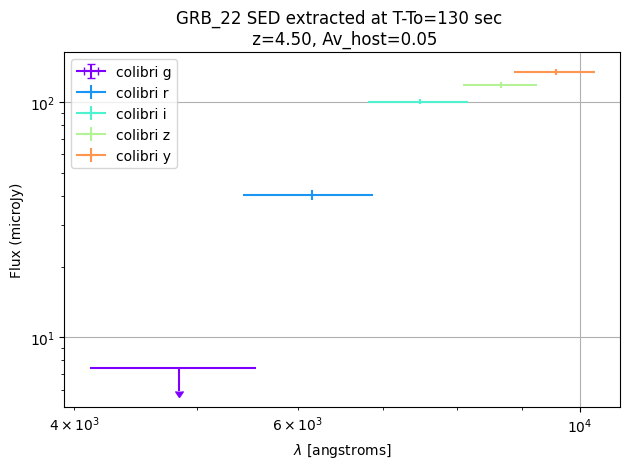


SEDS:
  Name  time_since_burst band        flux              flux_err       flux_unit
              s                                                               
------ ---------------- ---- ------------------ -------------------- ---------
GRB_22              130    g 21.726549533189363  0.21491577961998018        AB
GRB_22              130    r 19.890437286550274 0.052477661754920905        AB
GRB_22              130    i 18.897100000000002  0.02695525347364949        AB
GRB_22              130    z 18.719299999999997  0.02814983106668307        AB
GRB_22              130    y  18.57916555771549  0.03611609264182424        AB



In [16]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

#photoz.extract_sed(model='SPL',method='ReddestBand')
#photoz.extract_sed(model='BPL',method='fixed',time_SED=70)
photoz.extract_sed(model='SPL',method='fixed',time_SED=130)

In [17]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0,10])



Fit 1/1 	 Object: GRB_22 

z_lit: -99.00   Av_lit: -99.00
Running production


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 132.80it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 4;
tau: [19.70837238 18.45831576 17.7587827  20.80993071]



Autocorrelation time: 19.71 steps


Mean acceptance fraction: 0.059

Best fit:
z: 4.640  Av: 0.144  beta: 0.092  Norm: 1.906     chi2: 35.824

Mean Proba: 1.94e-10
Sum Proba: 5.82e-07

68% - 1 sigma:
z: 1.412 +2.817 -1.222
Av: 1.310 +1.562 -0.978
Beta: 1.051 +0.710 -0.606
norm: 5.656 +2.257 -3.165

95% - 2 sigma:
z: 1.412 +3.789 -1.396
Av: 1.310 +4.049 -1.235
Beta: 1.051 +1.530 -0.873
norm: 5.656 +3.836 -3.823

99% - 3 sigma:
z: 1.412 +4.050 -1.400
Av: 1.310 +5.165 -1.276
Beta: 1.051 +1.602 -1.034
norm: 5.656 +4.298 -4.853


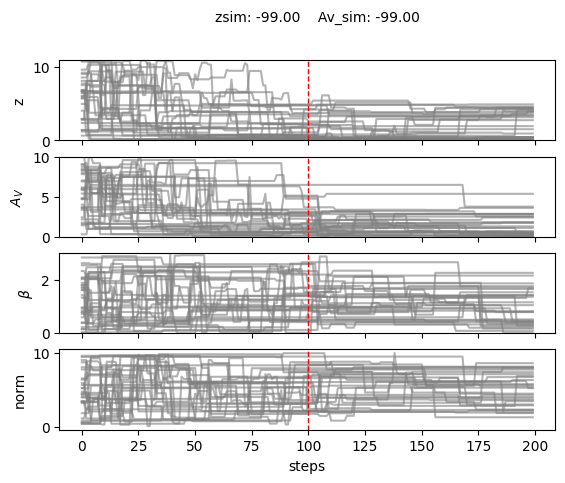

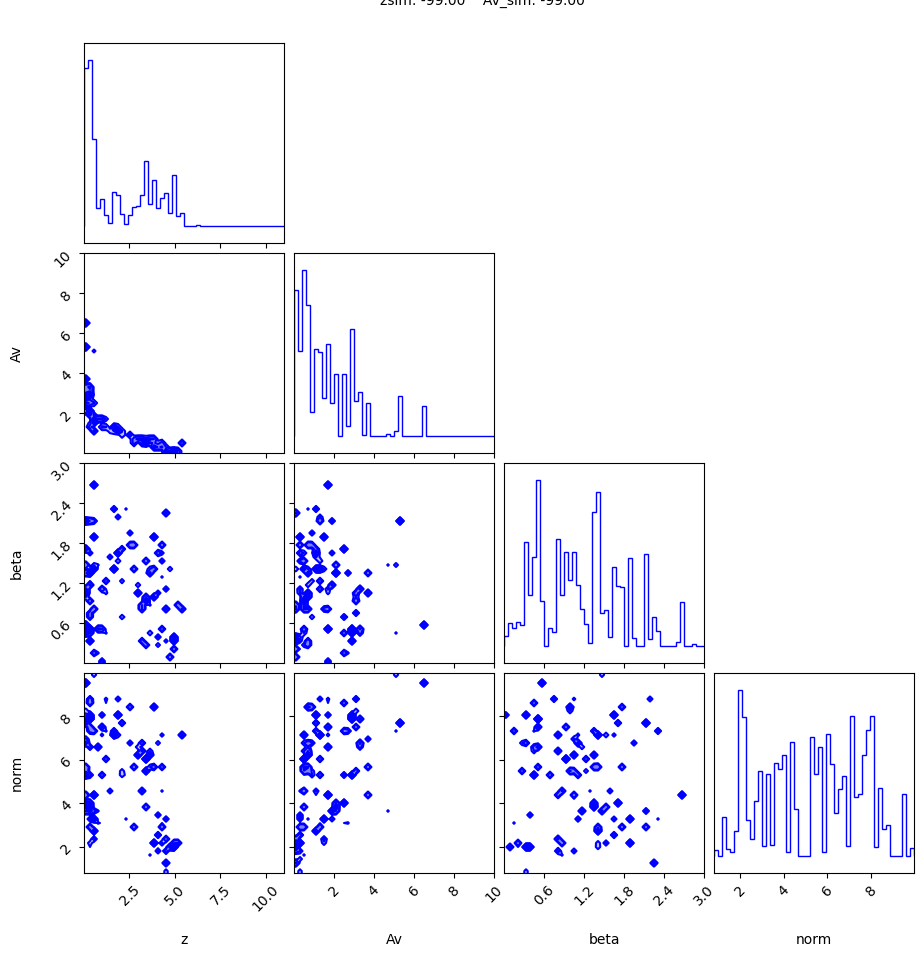


For best SED plot:
- Median values PDF: 1.412 1.310 1.051 5.656
- Best fit: 4.640 0.144 0.092 1.906


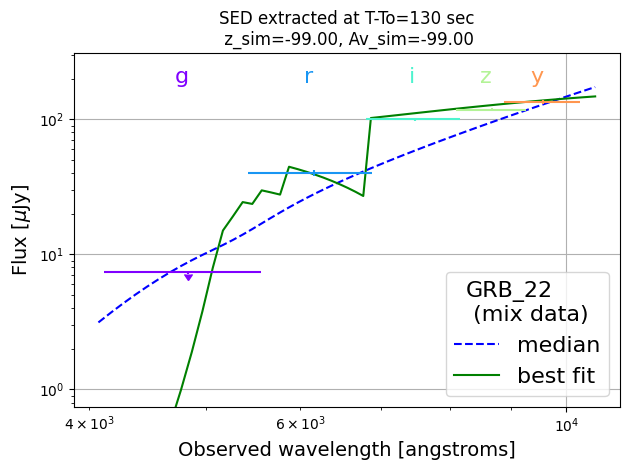


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB_22 

z_lit: -99.00   Av_lit: -99.00
Running production


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 129.65it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 4;
tau: [19.68228265 19.38993852 18.36850054 21.74761182]



Autocorrelation time: 19.68 steps


Mean acceptance fraction: 0.064

Best fit:
z: 4.357  Av: 0.470  beta: 0.183  Norm: 4.140     chi2: 18.860

Mean Proba: 9.24e-07
Sum Proba: 2.77e-03

68% - 1 sigma:
z: 3.685 +0.594 -3.523
Av: 0.649 +1.895 -0.241
Beta: 1.079 +0.602 -0.674
norm: 4.754 +2.136 -1.827

95% - 2 sigma:
z: 3.685 +0.803 -3.656
Av: 0.649 +2.415 -0.608
Beta: 1.079 +1.250 -0.982
norm: 4.754 +3.913 -3.625

99% - 3 sigma:
z: 3.685 +1.128 -3.656
Av: 0.649 +4.686 -0.638
Beta: 1.079 +1.735 -1.027
norm: 4.754 +4.704 -3.735


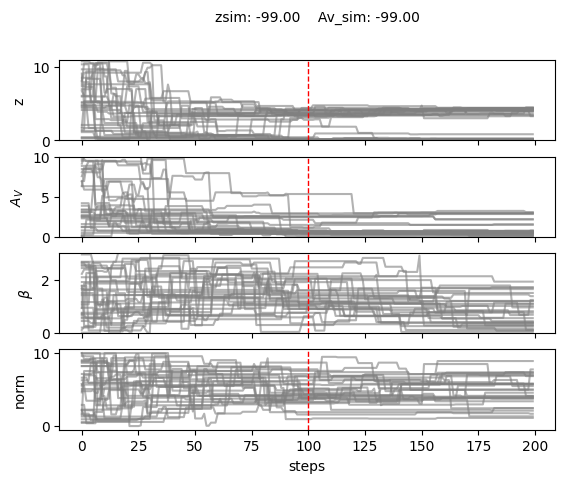

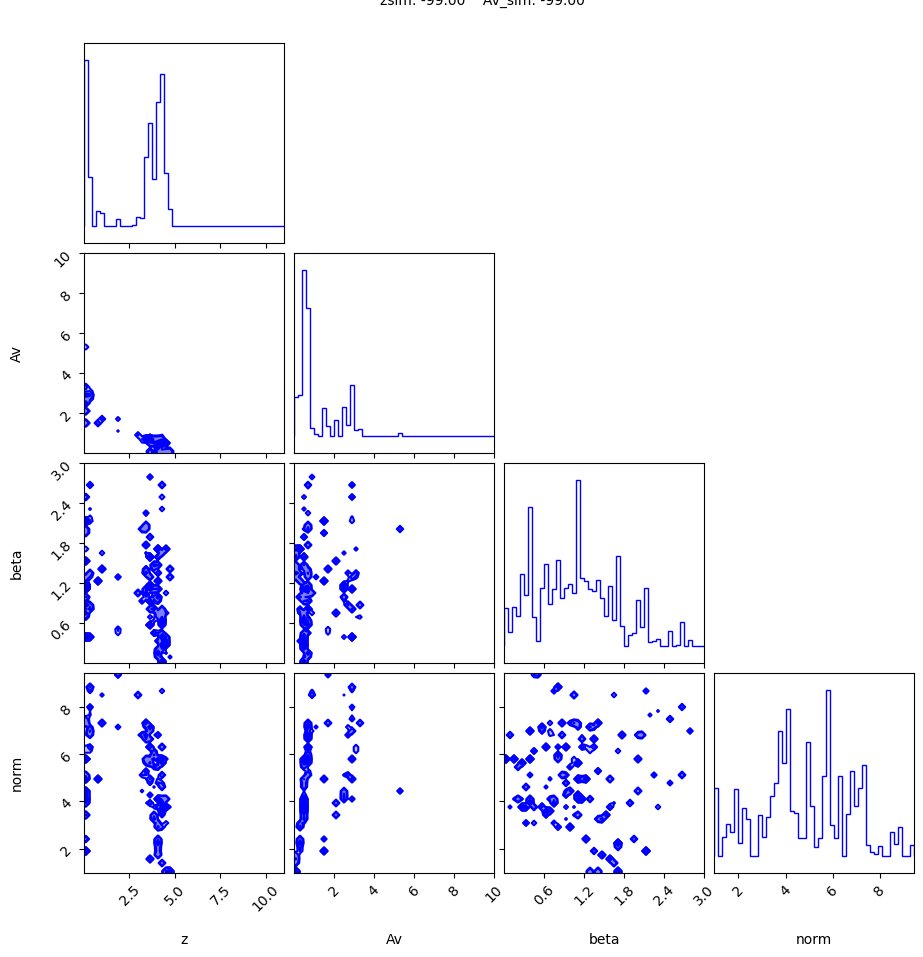


For best SED plot:
- Median values PDF: 3.685 0.649 1.079 4.754
- Best fit: 4.357 0.470 0.183 4.140


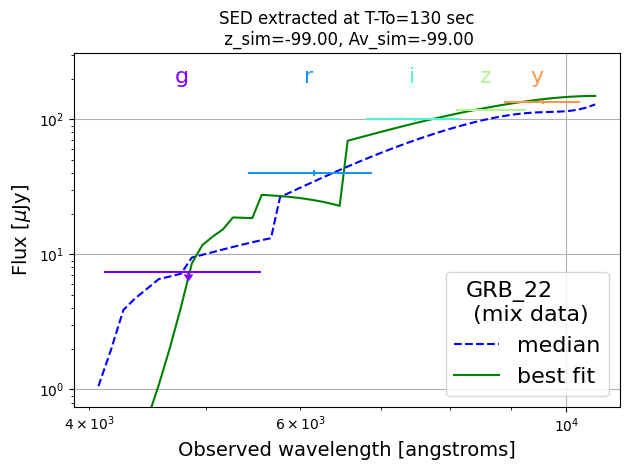


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB_22 

z_lit: -99.00   Av_lit: -99.00
Running production


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 131.63it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 4;
tau: [19.79764392 17.83494667 18.66018774 21.86912399]



Autocorrelation time: 19.80 steps


Mean acceptance fraction: 0.064

Best fit:
z: 4.184  Av: 0.621  beta: 0.828  Norm: 4.239     chi2: 7.078

Mean Proba: 9.73e-04
Sum Proba: 2.92e+00

68% - 1 sigma:
z: 3.508 +0.771 -3.343
Av: 0.751 +2.186 -0.241
Beta: 1.388 +0.962 -0.825
norm: 4.243 +2.281 -1.576

95% - 2 sigma:
z: 3.508 +0.976 -3.458
Av: 0.751 +4.635 -0.574
Beta: 1.388 +1.195 -1.216
norm: 4.243 +4.093 -2.627

99% - 3 sigma:
z: 3.508 +1.553 -3.487
Av: 0.751 +6.245 -0.574
Beta: 1.388 +1.556 -1.330
norm: 4.243 +5.590 -2.712


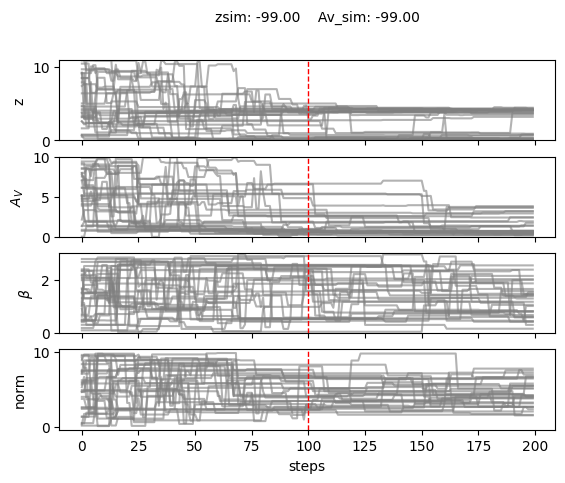

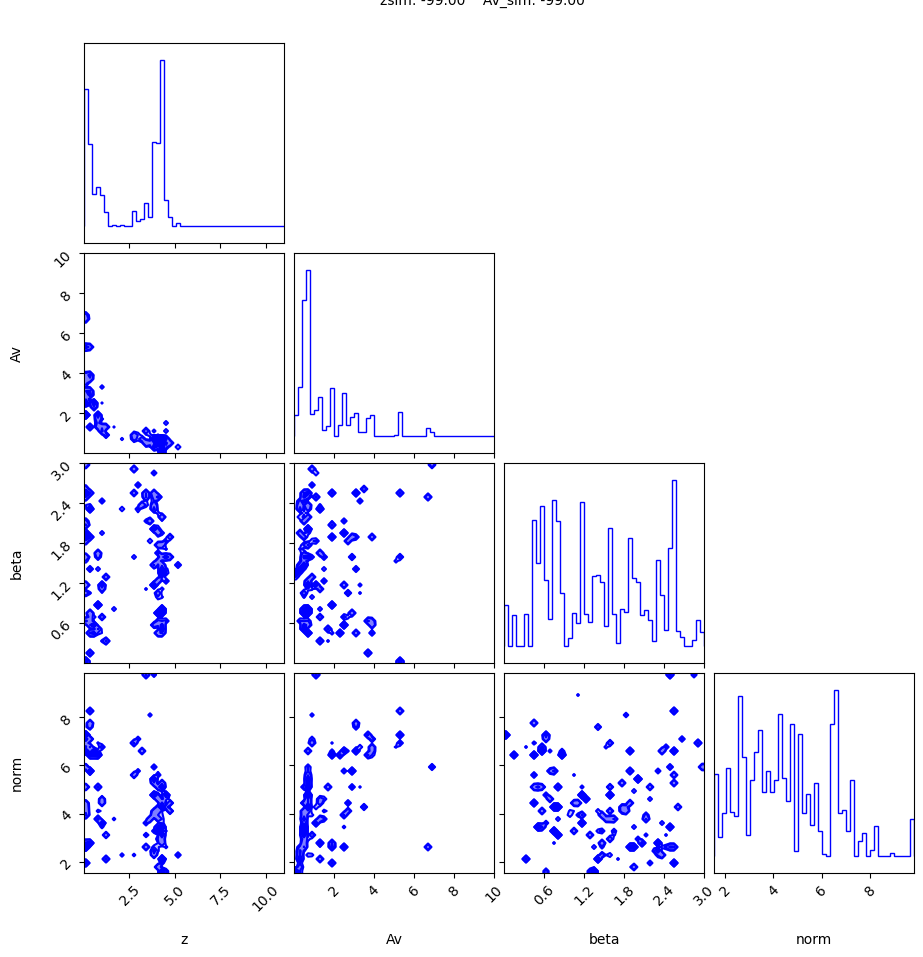


For best SED plot:
- Median values PDF: 3.508 0.751 1.388 4.243
- Best fit: 4.184 0.621 0.828 4.239


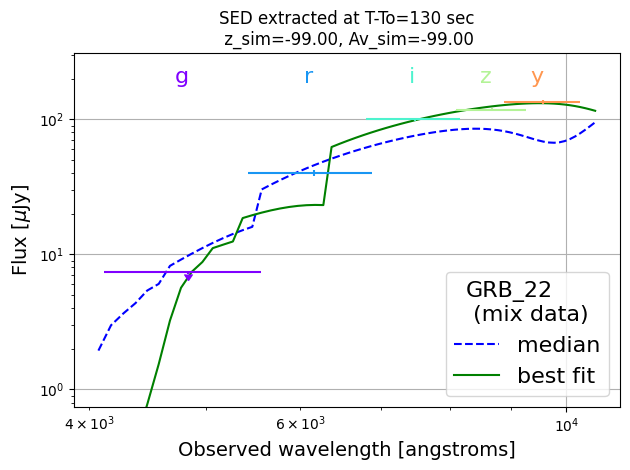


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB_22 

z_lit: -99.00   Av_lit: -99.00
Running production


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 163.48it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 4;
tau: [20.76292593 14.20705911 19.87405793]



Autocorrelation time: 20.76 steps


Mean acceptance fraction: 0.174

Best fit:
z: 4.567  beta: 1.056  Norm: 1.007     chi2: 4.341

Mean Proba: 2.61e-02
Sum Proba: 7.82e+01

68% - 1 sigma:
z: 4.536 +0.205 -0.067
Beta: 1.103 +0.192 -0.291
norm: 1.005 +0.026 -0.017

95% - 2 sigma:
z: 4.536 +2.674 -0.102
Beta: 1.103 +0.392 -1.027
norm: 1.005 +7.622 -0.037

99% - 3 sigma:
z: 4.536 +2.715 -0.171
Beta: 1.103 +0.706 -1.084
norm: 1.005 +7.700 -0.198


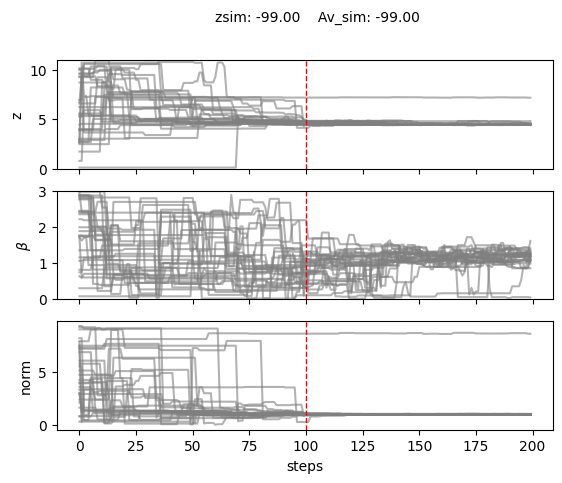

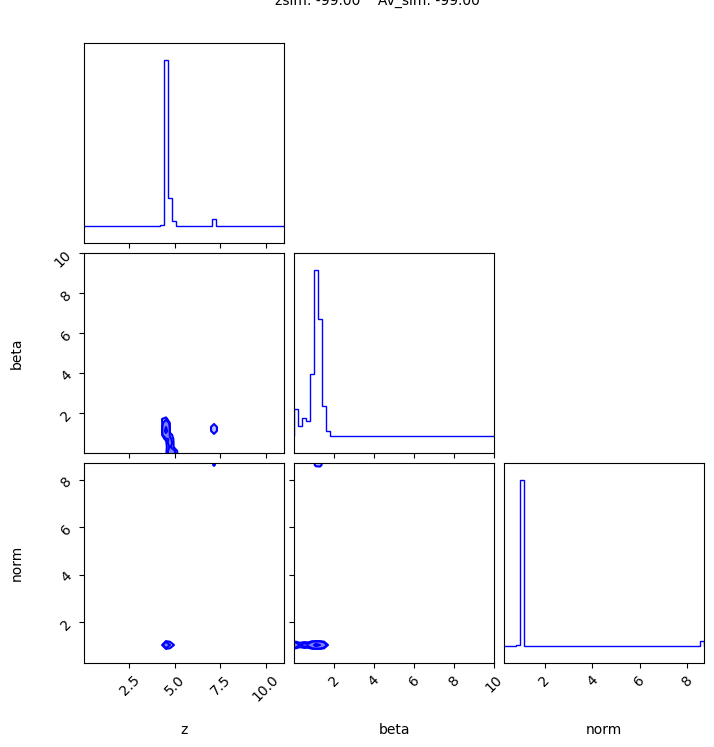


For best SED plot:
- Median values PDF: 4.536 0.000 1.103 1.005
- Best fit: 4.567 0.000 1.056 1.007


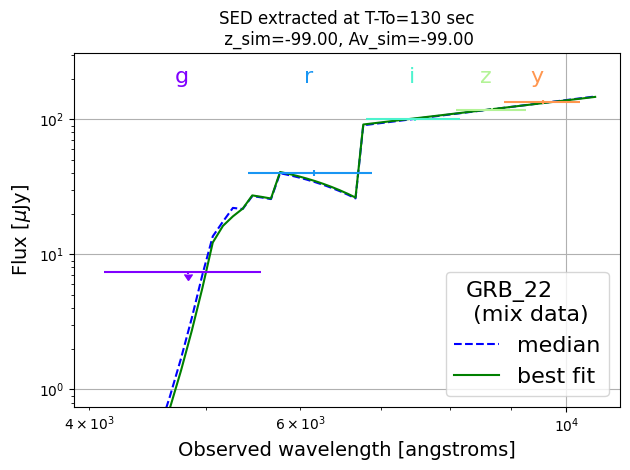


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB_22 

z_lit: -99.00   Av_lit: -99.00
Running production


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 138.16it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 4;
tau: [19.13486888 19.74399506 19.54218806 19.75410915]



Autocorrelation time: 19.13 steps


Mean acceptance fraction: 0.087

Best fit:
z: 3.185  Av: 1.174  beta: 0.644  Norm: 9.682     chi2: 7.986

Mean Proba: 4.17e-04
Sum Proba: 1.25e+00

68% - 1 sigma:
z: 3.174 +0.399 -2.384
Av: 1.061 +0.749 -0.345
Beta: 1.068 +0.823 -0.632
norm: 6.134 +2.748 -2.826

95% - 2 sigma:
z: 3.174 +3.255 -3.146
Av: 1.061 +6.724 -0.796
Beta: 1.068 +1.505 -0.959
norm: 6.134 +3.418 -5.008

99% - 3 sigma:
z: 3.174 +6.691 -3.168
Av: 1.061 +7.325 -0.815
Beta: 1.068 +1.885 -1.030
norm: 6.134 +3.839 -5.704


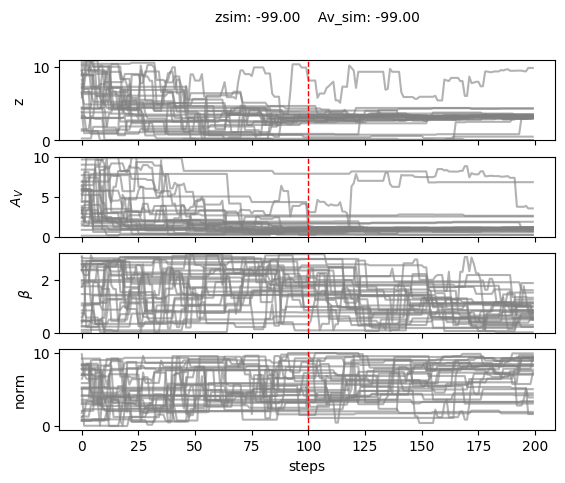

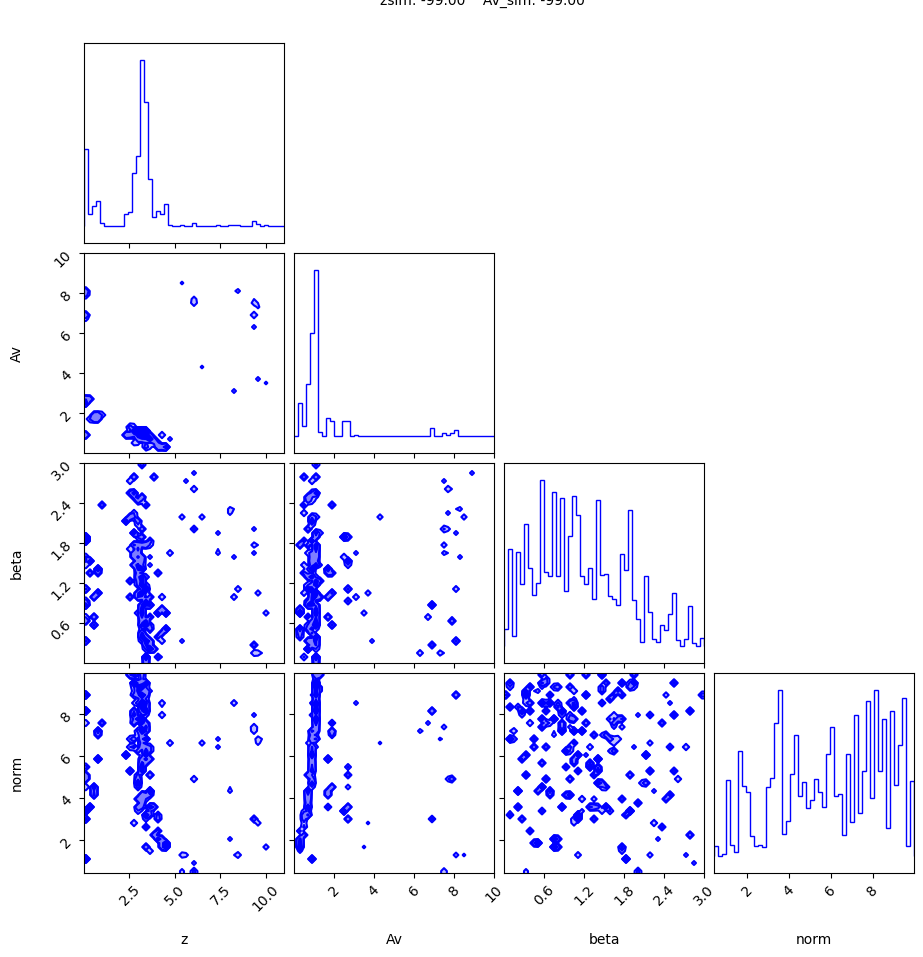


For best SED plot:
- Median values PDF: 3.174 1.061 1.068 6.134
- Best fit: 3.185 1.174 0.644 9.682


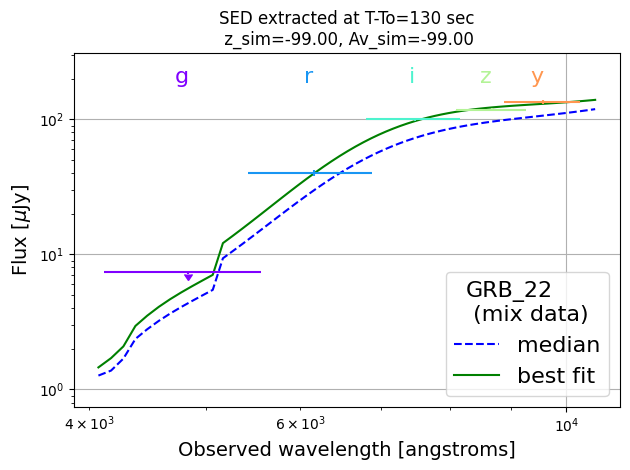


List of GRB not detected: []

None


In [18]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'

plo = ['smc', 'lmc', 'mw', 'nodust',"sne"]
for law in plo:
    photoz.fit(
    ext_law=law,
    Nthreads=6,
    nwalkers=30,
    Nsteps1=0,
    Nsteps2=1500,
    nburn=400,
    Host_dust=True,
    Host_gas=False,
    igm_att='Meiksin',
    clean_data=False,
    priors=priors,
    adapt_z=False
)

# Statistic comparison

In [ ]:
from pyGRBz.estimation import stats

In [ ]:
out = (path+"/results/Tuto/LC/GRB_22/"

In [ ]:
stats(out,ext_laws=plo,lim_bic=2)